# Business Case

> How can we predict interest rate based on borrower and loan attributes?

> We would like to use lending club loans data to explore how the interest rate charged on loans depends on various factors.

# Dataset Overview

>	LoansData.csv

The data have the following variables (with data type and explanation of meaning) <br>

•	**Amount.Requested** - numeric. The amount (in dollars) requested in the loan application. <br>

•	**Amount.Funded.By.Investors** - numeric. The amount (in dollars) loaned to the individual. <br>

•	**Interest.rate** – character. The lending interest rate charged to the borrower.<br>

•	**Loan.length** - character. The length of time (in months) of the loan.<br>

•	**Loan.Purpose** – categorical variable. The purpose of the loan as stated by the applicant.<br>

•	**Debt.to.Income.Ratio** – character. The % of consumer’s gross income going toward paying debts.<br>

•	**State - character**. The abbreviation for the U.S. state of residence of the loan applicant.<br>

•	**Home.ownership** - character. Indicates whether the applicant owns, rents, or has a mortgage.<br>

•	**Monthly.income** - categorical. The monthly income of the applicant (in dollars).<br>

•	**FICO.range** – categorical (expressed as a string label e.g. “650-655”). A range indicating the applicants FICO score.<br>

•	**Open.CREDIT.Lines** - numeric. The number of open lines of credit at the time of application.<br>

•	**Revolving.CREDIT.Balance** - numeric. The total amount outstanding all lines of credit.<br>

•	**Inquiries.in.the.Last.6.Months** - numeric. Number of credit inquiries in the previous 6 months.<br>

•	**Employment.Length** - character. Length of time employed at current job.<br>


# Import the packages

In [160]:
import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE, f_oneway, f_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from scipy import stats
import pylab
from sklearn.externals import joblib

C:\Users\Shyam prasath\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Import the Dataset

In [2]:
df = pd.read_csv('LoansData.csv')
df.head()

LoanID  Amount.Requested  Amount.Funded.By.Investors Interest.Rate  \
0       1           20000.0                     20000.0         8.90%   
1       2           19200.0                     19200.0        12.12%   
2       3           35000.0                     35000.0        21.98%   
3       4           10000.0                      9975.0         9.99%   
4       5           12000.0                     12000.0        11.71%   

  Loan.Length        Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0   36 months  debt_consolidation               14.90%    SC       MORTGAGE   
1   36 months  debt_consolidation               28.36%    TX       MORTGAGE   
2   60 months  debt_consolidation               23.81%    CA       MORTGAGE   
3   36 months  debt_consolidation               14.30%    KS       MORTGAGE   
4   36 months         credit_card               18.78%    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739               14.0                   14272.0   
1         4583.33    715-719               12.0                   11140.0   
2        11500.00    690-694               14.0                   21977.0   
3         3833.33    695-699               10.0                    9346.0   
4         3195.00    695-699               11.0                   14469.0   

   Inquiries.in.the.Last.6.Months Employment.Length  
0                             2.0          < 1 year  
1                             1.0           2 years  
2                             1.0           2 years  
3                             0.0           5 years  
4                             0.0           9 years

In [3]:
# Find the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [4]:
# Findout missing values
df.isnull().sum()

LoanID                             0
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

# Pandas Report

In [5]:
report = pandas_profiling.ProfileReport(df)
report

# Data Manipulation

In [6]:
df.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [7]:
# Change columns name
df.columns = [i.replace('.', '_') for i in df.columns]

In [8]:
df.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [9]:
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: float(str(x).replace('%', '')))
df['Loan_Length'] = df['Loan_Length'].apply(lambda x: float(str(x).replace(' months', '')))
df['Debt_To_Income_Ratio'] = df['Debt_To_Income_Ratio'].apply(lambda x: float(str(x).replace('%', '')))

In [10]:
df['Employment_Length'] = df['Employment_Length'].apply(lambda x: str(x).replace(' years', ''))
df['Employment_Length'] = df['Employment_Length'].apply(lambda x: str(x).replace('+', ''))
df['Employment_Length'] = df['Employment_Length'].apply(lambda x: str(x).replace('<', ''))
df['Employment_Length'] = df['Employment_Length'].apply(lambda x: float(str(x).replace(' year', '')))

In [11]:
df[['Fico_low', 'Fico_high']] = df['FICO_Range'].str.split('-', expand = True)

In [12]:
df['Fico_avg'] = (df['Fico_low'].astype('float') +  df['Fico_high'].astype('float'))/2

In [13]:
df.head()

LoanID  Amount_Requested  Amount_Funded_By_Investors  Interest_Rate  \
0       1           20000.0                     20000.0           8.90   
1       2           19200.0                     19200.0          12.12   
2       3           35000.0                     35000.0          21.98   
3       4           10000.0                      9975.0           9.99   
4       5           12000.0                     12000.0          11.71   

   Loan_Length        Loan_Purpose  Debt_To_Income_Ratio State Home_Ownership  \
0         36.0  debt_consolidation                 14.90    SC       MORTGAGE   
1         36.0  debt_consolidation                 28.36    TX       MORTGAGE   
2         60.0  debt_consolidation                 23.81    CA       MORTGAGE   
3         36.0  debt_consolidation                 14.30    KS       MORTGAGE   
4         36.0         credit_card                 18.78    NJ           RENT   

   Monthly_Income FICO_Range  Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0         6541.67    735-739               14.0                   14272.0   
1         4583.33    715-719               12.0                   11140.0   
2        11500.00    690-694               14.0                   21977.0   
3         3833.33    695-699               10.0                    9346.0   
4         3195.00    695-699               11.0                   14469.0   

   Inquiries_in_the_Last_6_Months  Employment_Length Fico_low Fico_high  \
0                             2.0                1.0      735       739   
1                             1.0                2.0      715       719   
2                             1.0                2.0      690       694   
3                             0.0                5.0      695       699   
4                             0.0                9.0      695       699   

   Fico_avg  
0     737.0  
1     717.0  
2     692.0  
3     697.0  
4     697.0

In [14]:
# Drop unwanted columns and high correleated columns
df.drop(['LoanID', 'FICO_Range', 'Fico_low', 'Fico_high', 'Amount_Funded_By_Investors'], axis = 1, inplace = True)

### Seperate the categorical and continuous data

In [15]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(exclude = ['object'])

In [16]:
print('The shape of Categorical Data: {}'.format(df_cat.shape))
print('The shape of Continuous Data: {}'.format(df_num.shape))

The shape of Categorical Data: (2500, 3)
The shape of Continuous Data: (2500, 10)


# Data Audit Report

In [17]:
def summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(),
                      x.quantile(0.1), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95),
                      x.quantile(0.99), x.max()], index = ['count', 'missing', 'sum', 'mean', 'median', 'Standard deviation',
                                                            'variance', 'minimum', '10th percentile',
                                                            '25th percentile', '50th percentile', '75th percentile',
                                                           '90th percentile', '95 percentile', '99th percentile', 'maximum'])

round(df_num.apply(summary).T,1)

count  missing         sum     mean   median  \
Amount_Requested                2499.0      1.0  31001250.0  12405.5  10000.0   
Interest_Rate                   2498.0      2.0     32637.3     13.1     13.1   
Loan_Length                     2500.0      0.0    103152.0     41.3     36.0   
Debt_To_Income_Ratio            2499.0      1.0     38435.7     15.4     15.3   
Monthly_Income                  2499.0      1.0  14216639.4   5688.9   5000.0   
Open_CREDIT_Lines               2497.0      3.0     25152.0     10.1      9.0   
Revolving_CREDIT_Balance        2497.0      3.0  38012292.0  15223.2  10948.0   
Inquiries_in_the_Last_6_Months  2497.0      3.0      2264.0      0.9      0.0   
Employment_Length               2423.0     77.0     13307.0      5.5      5.0   
Fico_avg                        2498.0      2.0   1768346.0    707.9    702.0   

                                Standard deviation     variance  minimum  \
Amount_Requested                            7802.9   60885773.8   1000.0   
Interest_Rate                                  4.2         17.4      5.4   
Loan_Length                                    9.9         98.6     36.0   
Debt_To_Income_Ratio                           7.5         56.3      0.0   
Monthly_Income                              3963.1   15706305.8    588.5   
Open_CREDIT_Lines                              4.5         20.3      2.0   
Revolving_CREDIT_Balance                   18281.0  334195518.9      0.0   
Inquiries_in_the_Last_6_Months                 1.2          1.5      0.0   
Employment_Length                              3.4         11.8      1.0   
Fico_avg                                      35.0       1228.0    642.0   

                                10th percentile  25th percentile  \
Amount_Requested                         4000.0           6000.0   
Interest_Rate                               7.6             10.2   
Loan_Length                                36.0             36.0   
Debt_To_Income_Ratio                        5.3              9.8   
Monthly_Income                           2600.0           3500.0   
Open_CREDIT_Lines                           5.0              7.0   
Revolving_CREDIT_Balance                 2298.8           5584.0   
Inquiries_in_the_Last_6_Months              0.0              0.0   
Employment_Length                           1.0              2.0   
Fico_avg                                  667.0            682.0   

                                50th percentile  75th percentile  \
Amount_Requested                        10000.0          17000.0   
Interest_Rate                              13.1             15.8   
Loan_Length                                36.0             36.0   
Debt_To_Income_Ratio                       15.3             20.7   
Monthly_Income                           5000.0           6800.0   
Open_CREDIT_Lines                           9.0             13.0   
Revolving_CREDIT_Balance                10948.0          18861.0   
Inquiries_in_the_Last_6_Months              0.0              1.0   
Employment_Length                           5.0             10.0   
Fico_avg                                  702.0            727.0   

                                90th percentile  95 percentile  \
Amount_Requested                        24000.0        28000.0   
Interest_Rate                              18.6           20.5   
Loan_Length                                60.0           60.0   
Debt_To_Income_Ratio                       25.0           28.3   
Monthly_Income                           9297.3        11666.7   
Open_CREDIT_Lines                          16.0           18.0   
Revolving_CREDIT_Balance                30047.0        40768.4   
Inquiries_in_the_Last_6_Months              3.0            3.0   
Employment_Length                          10.0           10.0   
Fico_avg                                  757.0          777.0   

                                99th percentile   maximum  
Amount_Requested   

# Handling Outliers

In [18]:
def outlier(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

df_num = df_num.apply(outlier)

# Handling missing Values

In [19]:
df_num.isnull().sum()

Amount_Requested                   1
Interest_Rate                      2
Loan_Length                        0
Debt_To_Income_Ratio               1
Monthly_Income                     1
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
Fico_avg                           2
dtype: int64

In [20]:
df_cat.isnull().sum()

Loan_Purpose      0
State             0
Home_Ownership    1
dtype: int64

In [21]:
df_num[df_num.Employment_Length.isnull()]

Amount_Requested  Interest_Rate  Loan_Length  Debt_To_Income_Ratio  \
91             16000.0           7.62         36.0                 6.480   
92              9525.0          15.81         36.0                11.350   
105             8000.0           7.62         36.0                 0.718   
111             9000.0           6.03         36.0                 5.580   
116            10000.0          10.16         36.0                 9.300   
...                ...            ...          ...                   ...   
2334            2875.0          18.49         36.0                14.110   
2423            3700.0           7.88         36.0                10.170   
2449           20950.0          22.95         60.0                12.510   
2465           12000.0           6.03         36.0                 9.610   
2491            8475.0           7.62         36.0                15.880   

      Monthly_Income  Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
91         6000.0000                8.0                   19539.0   
92         2666.6700               15.0                    5610.0   
105        3500.0000                7.0                       0.0   
111        9583.3300               11.0                     675.0   
116        3333.3300                8.0                    8940.0   
...              ...                ...                       ...   
2334       1416.4032                3.0                    3824.0   
2423       4985.0000                6.0                   11586.0   
2449      10416.6700               14.0                   12460.0   
2465       3100.0000                7.0                   11076.0   
2491       3983.3300                9.0                    6882.0   

      Inquiries_in_the_Last_6_Months  Employment_Length  Fico_avg  
91                               0.0                NaN     767.0  
92                               1.0                NaN     672.0  
105                              1.0                NaN     767.0  
111                              0.0                NaN     807.0  
116                              2.0                NaN     727.0  
...                              ...                ...       ...  
2334                             0.0                NaN     667.0  
2423                             4.0                NaN     722.0  
2449                             3.0                NaN     667.0  
2465                             0.0                NaN     757.0  
2491                             NaN                NaN     722.0  

[77 rows x 10 columns]

In [22]:
df_num.groupby('Employment_Length').mean()

Amount_Requested  Interest_Rate  Loan_Length  \
Employment_Length                                                 
1.0                    11118.266979      12.696833    39.147541   
2.0                    11418.930041      12.818329    41.704918   
3.0                    11087.659574      12.774621    41.923404   
4.0                    11958.723958      13.132624    41.500000   
5.0                    12235.024752      13.390266    41.821782   
6.0                    11621.472393      13.287472    41.595092   
7.0                    12671.653543      13.097748    39.401575   
8.0                    12712.962963      12.987702    42.000000   
9.0                    15319.444444      13.152610    42.666667   
10.0                   14364.050536      13.330783    42.211332   

                   Debt_To_Income_Ratio  Monthly_Income  Open_CREDIT_Lines  \
Employment_Length                                                            
1.0                           14.971429     5312.463448           9.658824   
2.0                           15.147648     5551.764725           9.594262   
3.0                           14.946366     4954.336255           9.770213   
4.0                           15.152729     5368.914929          10.510417   
5.0                           15.519693     5751.803283          10.356436   
6.0                           15.207706     5540.080613           9.901840   
7.0                           15.066205     5971.789843          10.149606   
8.0                           15.340093     5930.026789          10.129630   
9.0                           16.151222     5715.054167           9.944444   
10.0                          15.962095     6141.417243          10.493865   

                   Revolving_CREDIT_Balance  Inquiries_in_the_Last_6_Months  \
Employment_Length                                                             
1.0                            12835.093271                        0.917647   
2.0                            13236.670328                        0.930328   
3.0                            11496.387234                        0.855319   
4.0                            14280.228750                        0.760417   
5.0                            14131.648515                        0.905941   
6.0                            13465.494724                        1.000000   
7.0                            12968.259843                        0.881890   
8.0                            14676.283704                        0.944444   
9.0                            15670.745000                        0.791667   
10.0                           19006.155399                        0.865237   

                     Fico_avg  
Employment_Length              
1.0                707.117096  
2.0                709.622951  
3.0                708.404255  
4.0                706.843750  
5.0                705.781095  
6.0                706.074074  
7.0                703.614173  
8.0                709.175926  
9.0                710.472222  
10.0               709.511485

In [23]:
df_num.loc[(df_num['Monthly_Income']< 2500) & (df_num['Employment_Length'].isnull()),['Employment_Length']] = 1.0
df_num.loc[(df_num['Monthly_Income'] >= 2500) & (df_num['Monthly_Income'] < 3500) & df_num['Employment_Length'].isnull(), ['Employment_Length']] = 2.0
df_num.loc[(df_num['Monthly_Income'] >= 3500) & (df_num['Monthly_Income'] < 4500) & df_num['Employment_Length'].isnull(), ['Employment_Length']] = 3.0
df_num.loc[(df_num['Monthly_Income'] >= 4500) & (df_num['Monthly_Income'] < 6500) & df_num['Employment_Length'].isnull(), ['Employment_Length']] = 4.0
df_num.loc[(df_num['Monthly_Income'] >= 6500) & (df_num['Monthly_Income'] < 8500) & df_num['Employment_Length'].isnull(), ['Employment_Length']] = 5.0
df_num.loc[(df_num['Monthly_Income'] >= 8500) & df_num['Employment_Length'].isnull(), ['Employment_Length']] = 6.0

In [24]:
# Impute the very few missing values in numerical columns
def missing_num(x):
    x = x.fillna(x.median())
    return x

df_num = df_num.apply(missing_num)

In [25]:
# Impute the very few missing values in categorical columns
def missing_cat(x):
    x = x.fillna('NONE')
    return x

df_cat = df_cat.apply(missing_cat)

# Concat categorical and continuous variables

In [26]:
lst = []
for i in df_cat.columns:
    val = df_cat[i].value_counts()
    lst.append(val)

In [27]:
lst

[debt_consolidation    1307
 credit_card            444
 other                  201
 home_improvement       152
 major_purchase         101
 small_business          87
 car                     50
 wedding                 39
 medical                 30
 moving                  29
 vacation                21
 house                   20
 educational             15
 renewable_energy         4
 Name: Loan_Purpose, dtype: int64,
 CA    433
 NY    255
 TX    174
 FL    169
 IL    101
 GA     98
 PA     96
 NJ     94
 VA     78
 MA     73
 OH     71
 MD     68
 NC     64
 CO     61
 WA     58
 CT     50
 AZ     46
 MI     45
 MN     38
 AL     38
 MO     33
 NV     32
 OR     30
 SC     28
 WI     26
 KY     23
 LA     22
 KS     21
 OK     21
 UT     16
 NH     15
 WV     15
 RI     15
 NM     13
 AR     13
 HI     12
 DC     11
 AK     11
 DE      8
 MT      7
 VT      5
 SD      4
 WY      4
 IN      3
 IA      1
 MS      1
 Name: State, dtype: int64,
 MORTGAGE    1147
 RENT        1146
 OW

In [28]:
df1 = pd.concat([df_num, df_cat],axis =1)

In [29]:
df1.head()

Amount_Requested  Interest_Rate  Loan_Length  Debt_To_Income_Ratio  \
0           20000.0           8.90         36.0                 14.90   
1           19200.0          12.12         36.0                 28.36   
2           35000.0          21.98         60.0                 23.81   
3           10000.0           9.99         36.0                 14.30   
4           12000.0          11.71         36.0                 18.78   

   Monthly_Income  Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0         6541.67               14.0                   14272.0   
1         4583.33               12.0                   11140.0   
2        11500.00               14.0                   21977.0   
3         3833.33               10.0                    9346.0   
4         3195.00               11.0                   14469.0   

   Inquiries_in_the_Last_6_Months  Employment_Length  Fico_avg  \
0                             2.0                1.0     737.0   
1                             1.0                2.0     717.0   
2                             1.0                2.0     692.0   
3                             0.0                5.0     697.0   
4                             0.0                9.0     697.0   

         Loan_Purpose State Home_Ownership  
0  debt_consolidation    SC       MORTGAGE  
1  debt_consolidation    TX       MORTGAGE  
2  debt_consolidation    CA       MORTGAGE  
3  debt_consolidation    KS       MORTGAGE  
4         credit_card    NJ           RENT

In [30]:
df1.Home_Ownership.value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           2
Name: Home_Ownership, dtype: int64

# Visualization

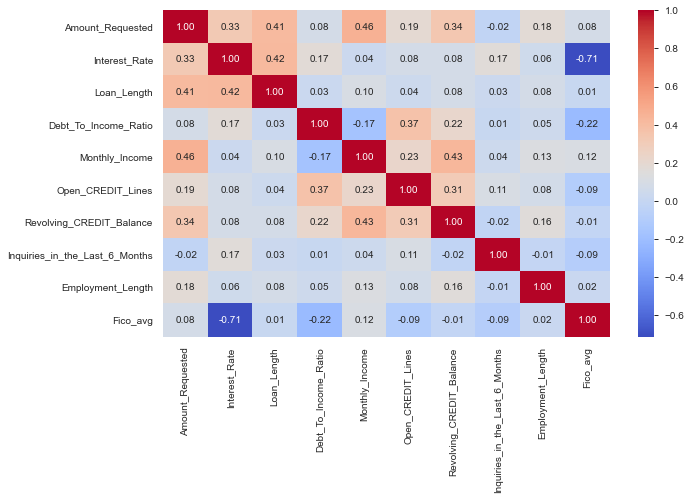

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

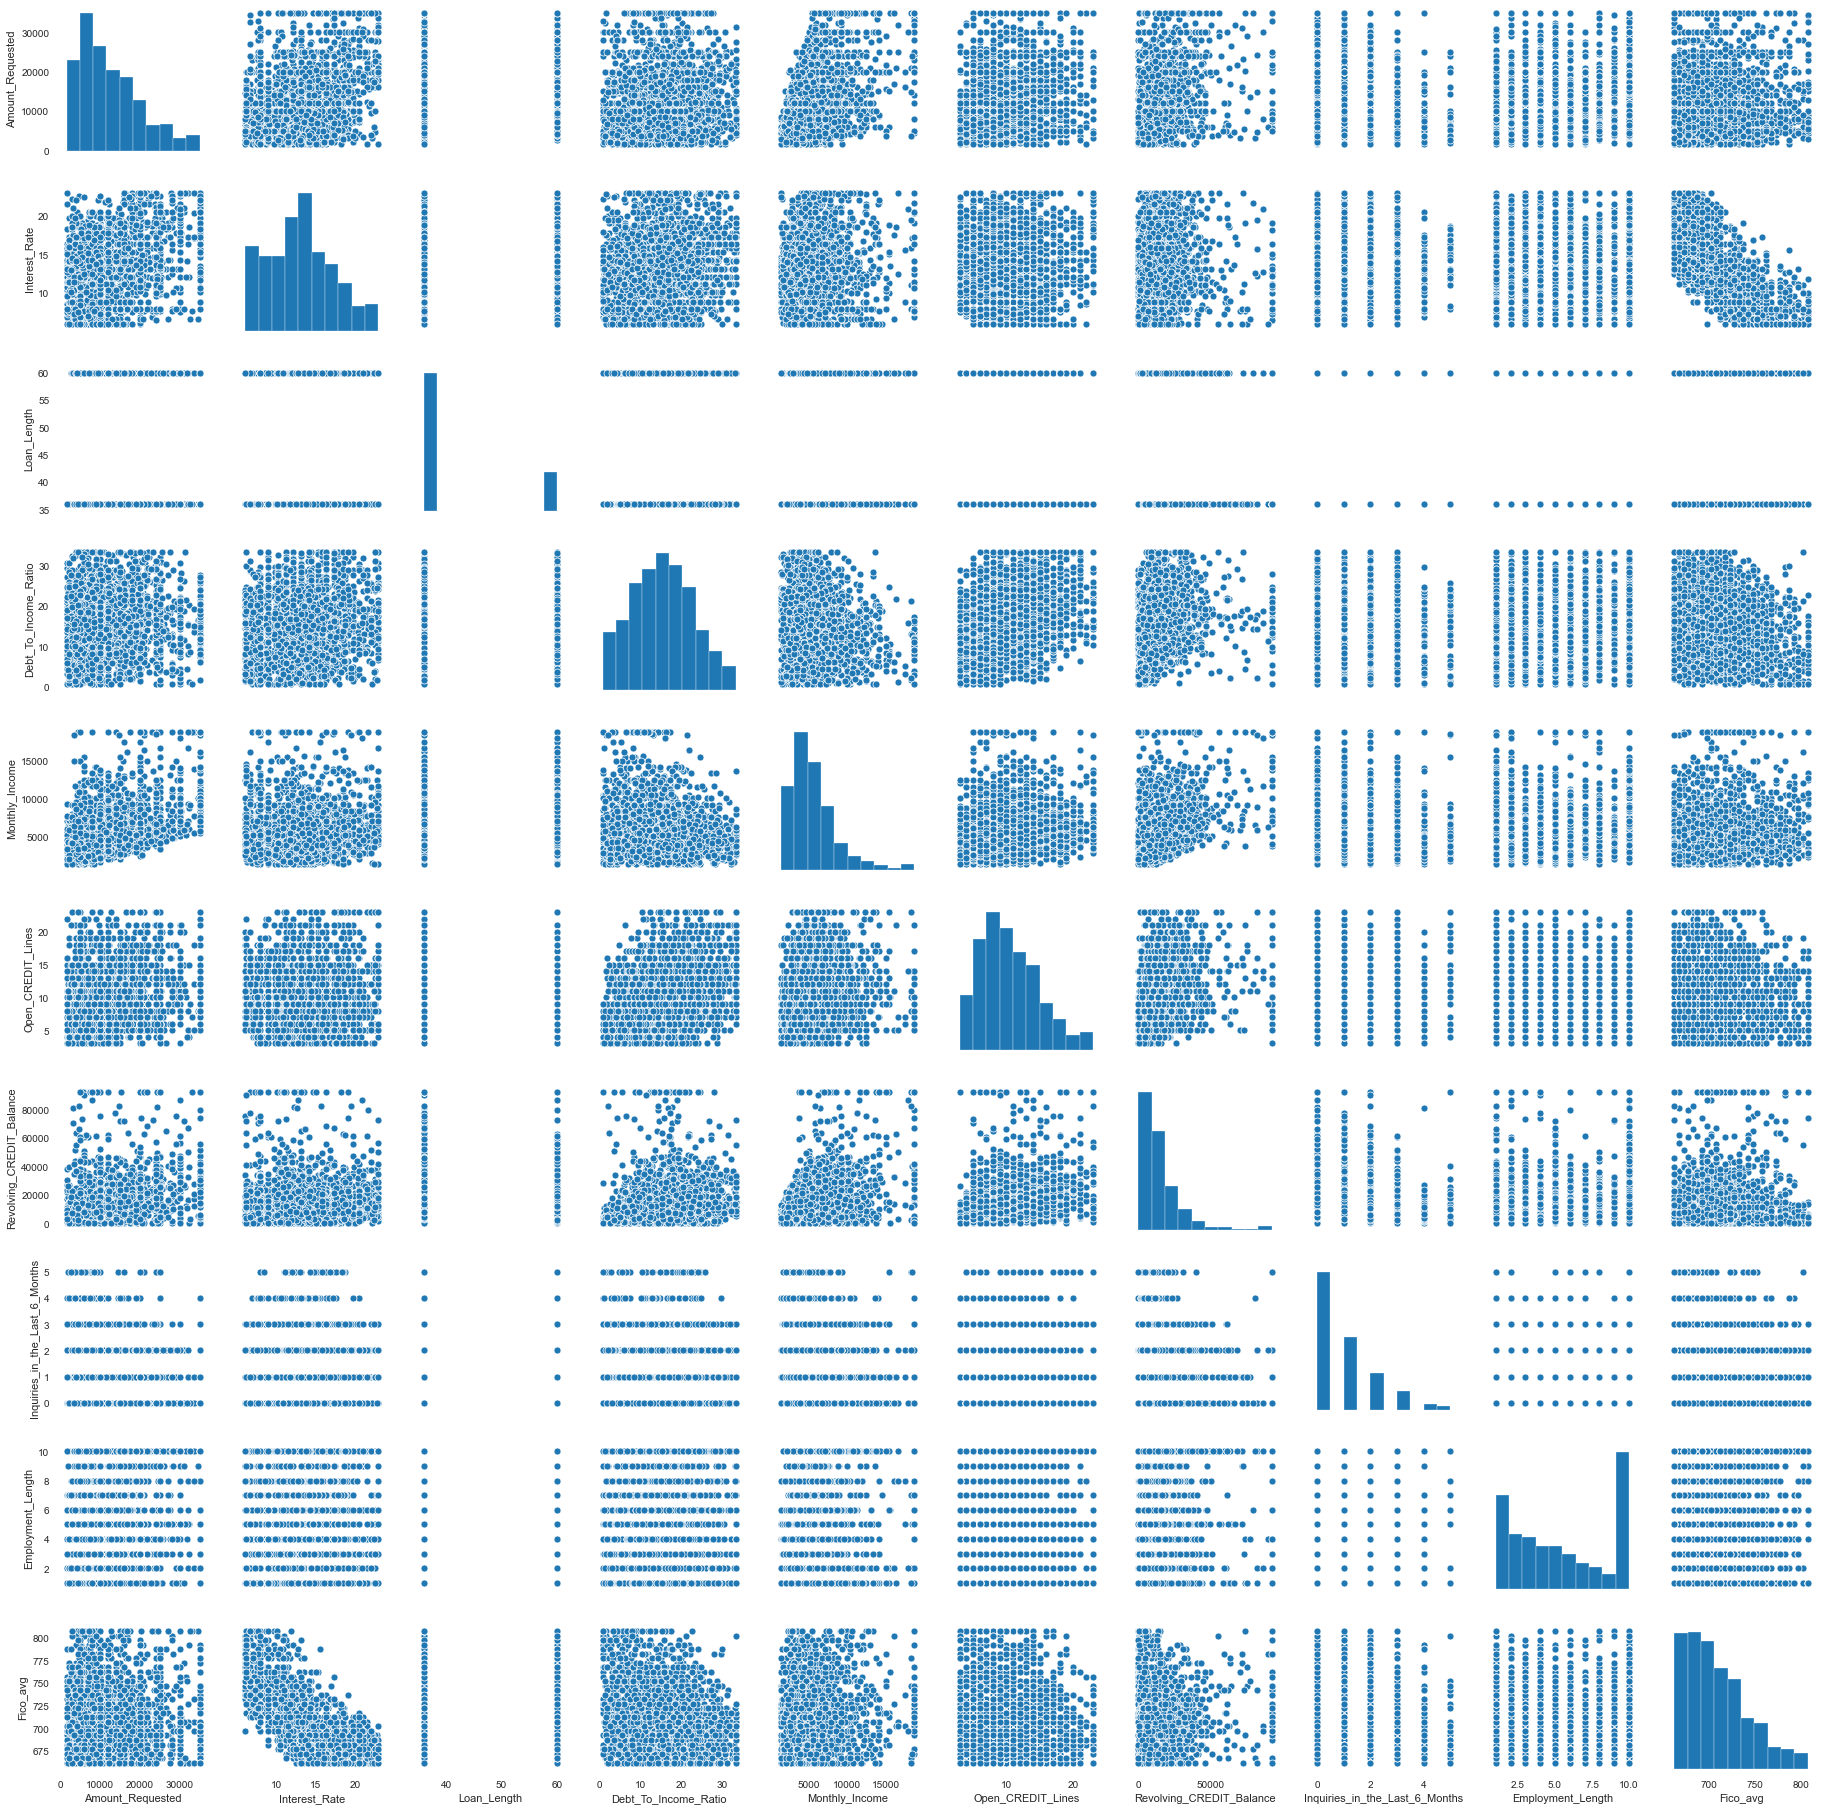

In [31]:
sns.pairplot(df1)
plt.show()

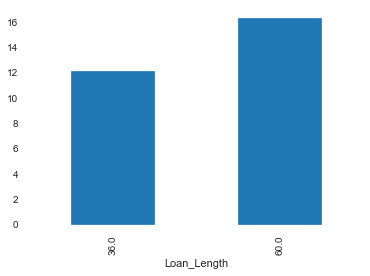

In [32]:
df1.groupby('Loan_Length')['Interest_Rate'].mean().plot(kind = 'bar')
plt.show()

> Here we know that the loan tenure is less obviously the interest rate will be low.

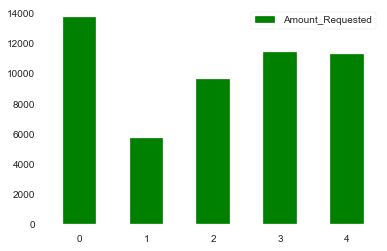

In [33]:
df1.groupby('Home_Ownership')['Amount_Requested'].mean().reset_index().plot(kind = 'bar', color = 'green')
plt.xticks(rotation=0)
plt.show()

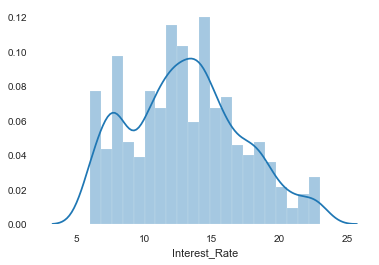

In [34]:
sns.distplot(df1['Interest_Rate'])
plt.show()

> The target variable is not normally distributed, so we need to transform the target variable

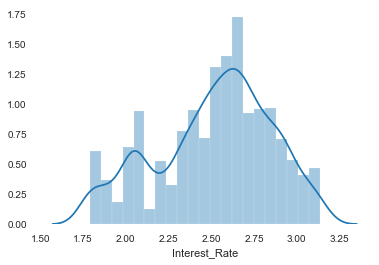

In [35]:
sns.distplot(np.log(df1['Interest_Rate']))
plt.show()

In [36]:
df1['ln_Interest_Rate'] = np.log(df1['Interest_Rate'])

# Onehot Encoding

In [37]:
df1.columns

Index(['Amount_Requested', 'Interest_Rate', 'Loan_Length',
       'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Fico_avg', 'Loan_Purpose', 'State',
       'Home_Ownership', 'ln_Interest_Rate'],
      dtype='object')

In [38]:
df1.isnull().sum()

Amount_Requested                  0
Interest_Rate                     0
Loan_Length                       0
Debt_To_Income_Ratio              0
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
Fico_avg                          0
Loan_Purpose                      0
State                             0
Home_Ownership                    0
ln_Interest_Rate                  0
dtype: int64

In [39]:
df1 = pd.get_dummies(df1, columns = ['Home_Ownership', 'State', 'Loan_Purpose'], drop_first=True)
df1.head()

Amount_Requested  Interest_Rate  Loan_Length  Debt_To_Income_Ratio  \
0           20000.0           8.90         36.0                 14.90   
1           19200.0          12.12         36.0                 28.36   
2           35000.0          21.98         60.0                 23.81   
3           10000.0           9.99         36.0                 14.30   
4           12000.0          11.71         36.0                 18.78   

   Monthly_Income  Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0         6541.67               14.0                   14272.0   
1         4583.33               12.0                   11140.0   
2        11500.00               14.0                   21977.0   
3         3833.33               10.0                    9346.0   
4         3195.00               11.0                   14469.0   

   Inquiries_in_the_Last_6_Months  Employment_Length  Fico_avg  ...  \
0                             2.0                1.0     737.0  ...   
1                             1.0                2.0     717.0  ...   
2                             1.0                2.0     692.0  ...   
3                             0.0                5.0     697.0  ...   
4                             0.0                9.0     697.0  ...   

   Loan_Purpose_home_improvement  Loan_Purpose_house  \
0                              0                   0   
1                              0                   0   
2                              0                   0   
3                              0                   0   
4                              0                   0   

   Loan_Purpose_major_purchase  Loan_Purpose_medical  Loan_Purpose_moving  \
0                            0                     0                    0   
1                            0                     0                    0   
2                            0                     0                    0   
3                            0                     0                    0   
4                            0                     0                    0   

   Loan_Purpose_other  Loan_Purpose_renewable_energy  \
0                   0                              0   
1                   0                              0   
2                   0                              0   
3                   0                              0   
4                   0                              0   

   Loan_Purpose_small_business  Loan_Purpose_vacation  Loan_Purpose_wedding  
0                            0                      0                     0  
1                            0                      0                     0  
2                            0                      0                     0  
3                            0                      0                     0  
4                            0                      0                     0  

[5 rows x 73 columns]

In [42]:
df1.isnull().sum()

Amount_Requested                 0
Interest_Rate                    0
Loan_Length                      0
Debt_To_Income_Ratio             0
Monthly_Income                   0
                                ..
Loan_Purpose_other               0
Loan_Purpose_renewable_energy    0
Loan_Purpose_small_business      0
Loan_Purpose_vacation            0
Loan_Purpose_wedding             0
Length: 73, dtype: int64

# Coefficient of variance(cv)

In [40]:
cv = df1.apply(lambda x: np.mean(x)/np.std(x))

In [41]:
cv[cv<0.05]

Home_Ownership_NONE              0.028296
Home_Ownership_OTHER             0.044766
State_IA                         0.020004
State_IN                         0.034662
State_MS                         0.020004
State_SD                         0.040032
State_VT                         0.044766
State_WY                         0.040032
Loan_Purpose_renewable_energy    0.040032
dtype: float64

> Drop the columns which is having very less coefficient of variance

In [42]:
df1.drop(['Home_Ownership_NONE', 'Home_Ownership_OTHER', 'State_IA', 'State_IN', 'State_MS', 'State_SD', 'State_VT', 'State_WY', 'Loan_Purpose_renewable_energy'], axis = 1, inplace = True)

# Feature Engineering

### Recrusive feature engineering

In [43]:
feature = df1[df1.columns.difference(['Interest_Rate', 'ln_Interest_Rate'])]
target = df1['ln_Interest_Rate']

In [44]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=15).fit(feature, target)

In [45]:
rfe_col = feature.columns[rfe.get_support()]
list(rfe_col)

['Amount_Requested',
 'Debt_To_Income_Ratio',
 'Employment_Length',
 'Fico_avg',
 'Home_Ownership_RENT',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_other',
 'Monthly_Income',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'State_CA',
 'State_FL',
 'State_TX']

### SelectKBest

In [46]:
skb = SelectKBest(f_oneway, k = 15).fit(feature, target)

In [47]:
skb_col = feature.columns[skb.get_support()]
list(skb_col)

['Fico_avg',
 'Loan_Purpose_educational',
 'Loan_Purpose_house',
 'State_AR',
 'State_DC',
 'State_DE',
 'State_HI',
 'State_KS',
 'State_MT',
 'State_NH',
 'State_NM',
 'State_OK',
 'State_RI',
 'State_UT',
 'State_WV']

# F-Regression (univariant Regression)

In [48]:
f_value, p_value = f_regression(feature, target)

In [49]:
f_reg = [(i,v,z) for i,v,z in itertools.zip_longest(feature.columns, f_value, ['%.3f' %p for p in p_value])]

In [50]:
f_reg = pd.DataFrame(f_reg, columns = ['Features', 'F_value', 'P_value'])
f_reg.sort_values(by = ['P_value'], ascending = True, inplace = True)

In [51]:
f_reg.head(15)

Features      F_value P_value
0                  Amount_Requested   250.674653   0.000
1              Debt_To_Income_Ratio    82.469906   0.000
3                          Fico_avg  3100.724445   0.000
22         Revolving_CREDIT_Balance    16.004991   0.000
5               Home_Ownership_RENT    18.616762   0.000
6    Inquiries_in_the_Last_6_Months    81.193740   0.000
7                       Loan_Length   438.267854   0.000
9   Loan_Purpose_debt_consolidation    45.372662   0.000
13      Loan_Purpose_major_purchase    31.624958   0.000
11    Loan_Purpose_home_improvement    24.097597   0.000
21                Open_CREDIT_Lines    11.718188   0.001
40                         State_MI     6.405636   0.011
14             Loan_Purpose_medical     5.121913   0.024
33                         State_HI     4.922844   0.027
2                 Employment_Length     3.810148   0.051

In [52]:
f_reg_col = f_reg.Features.head(15).values
list(f_reg_col)

['Amount_Requested',
 'Debt_To_Income_Ratio',
 'Fico_avg',
 'Revolving_CREDIT_Balance',
 'Home_Ownership_RENT',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Open_CREDIT_Lines',
 'State_MI',
 'Loan_Purpose_medical',
 'State_HI',
 'Employment_Length']

### Taking Final list columns

In [53]:
final_list = ['Amount_Requested',
             'Debt_To_Income_Ratio',
             'Employment_Length',
             'Fico_avg',
             'Home_Ownership_RENT',
             'Inquiries_in_the_Last_6_Months',
             'Loan_Length',
             'Loan_Purpose_debt_consolidation',
             'Loan_Purpose_other',
             'Monthly_Income',
             'Open_CREDIT_Lines',
             'Revolving_CREDIT_Balance',
             'State_CA',
             'State_FL',
             'State_TX',
             'Loan_Purpose_educational',
             'Loan_Purpose_house',
             'State_AR',
             'State_DC',
             'State_DE',
             'State_HI',
             'State_KS',
             'State_MT',
             'State_NH',
             'State_NM',
             'State_OK',
             'State_RI',
             'State_UT',
             'State_WV',
             'Loan_Purpose_major_purchase',
             'Loan_Purpose_home_improvement',
             'State_MI',
             'Loan_Purpose_medical'
            ]

In [54]:
feature = feature[final_list]

# Variance Inflation Factor(VIF)

In [55]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(feature.values,i) for i in range(feature.shape[1])]
vif['features'] = feature.columns
vif.sort_values(by = ['vif_factor'], ascending = False)

vif_factor                         features
3    32.688381                         Fico_avg
6    21.787755                      Loan_Length
10    8.431661                Open_CREDIT_Lines
9     7.457072                   Monthly_Income
1     7.145593             Debt_To_Income_Ratio
0     6.012609                 Amount_Requested
2     3.814945                Employment_Length
7     2.999546  Loan_Purpose_debt_consolidation
11    2.971441         Revolving_CREDIT_Balance
4     2.165033              Home_Ownership_RENT
5     1.660077   Inquiries_in_the_Last_6_Months
8     1.331749               Loan_Purpose_other
12    1.323514                         State_CA
30    1.322364    Loan_Purpose_home_improvement
29    1.199271      Loan_Purpose_major_purchase
14    1.131635                         State_TX
13    1.119014                         State_FL
32    1.057351             Loan_Purpose_medical
16    1.040598               Loan_Purpose_house
15    1.040255         Loan_Purpose_educational
31    1.035416                         State_MI
21    1.020103                         State_KS
23    1.020093                         State_NH
25    1.020073                         State_OK
28    1.019444                         State_WV
22    1.018163                         State_MT
24    1.017424                         State_NM
26    1.016888                         State_RI
20    1.016596                         State_HI
18    1.014983                         State_DC
27    1.014089                         State_UT
17    1.012007                         State_AR
19    1.008720                         State_DE

In [112]:
target

0       2.186051
1       2.494857
2       3.090133
3       2.301585
4       2.460443
          ...   
2495    2.819592
2496    2.645465
2497    2.638343
2498    2.519308
2499    2.623944
Name: ln_Interest_Rate, Length: 2500, dtype: float64

# Stats Model

# Train Test Split

In [56]:
ols_data = pd.concat([feature,  target], axis = 1)

In [57]:
train, test = train_test_split(ols_data, test_size = 0.3, random_state = 123)

In [59]:
formula = 'ln_Interest_Rate~'+ '+'.join(ols_data.columns.difference(['ln_Interest_Rate']))

In [60]:
ols = smf.ols(formula, data = ols_data).fit()

In [61]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     267.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:32:55   Log-Likelihood:                 1076.0
No. Observations:                2500   AIC:                            -2084.
Df Residuals:                    2466   BIC:                            -1886.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

> Drop the variables having high pvalue and rebuilt the model

In [69]:
formula = 'ln_Interest_Rate ~ Amount_Requested + Fico_avg + Inquiries_in_the_Last_6_Months + Loan_Length + Loan_Purpose_other + Monthly_Income + Open_CREDIT_Lines + State_TX'

In [70]:
ols = smf.ols(formula, data = ols_data).fit()

In [71]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1106.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:18:06   Log-Likelihood:                 1068.0
No. Observations:                2500   AIC:                            -2118.
Df Residuals:                    2491   BIC:                            -2066.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# Predict the values

In [73]:
ols_predict_train = np.exp(ols.predict(train))
ols_predict_test = np.exp(ols.predict(test))

In [81]:
result_train = pd.DataFrame({'Actual': np.exp(train['ln_Interest_Rate']), 'Predicted': ols_predict_train})
result_test = pd.DataFrame({'Actual': np.exp(test['ln_Interest_Rate']), 'Predicted': ols_predict_test})

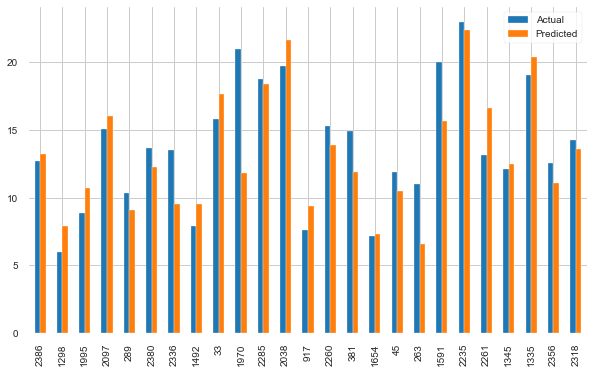

In [137]:
result_test.head(25).plot(kind = 'bar', figsize = (10,6))
plt.grid()
plt.show()

# Finding Metrics

In [89]:
train_RMSE = np.sqrt(np.mean(np.square(result_train['Actual'] - result_train['Predicted'])))
test_RMSE = np.sqrt(np.mean(np.square(result_test['Actual'] - result_test['Predicted'])))

print('The Train RMSE is : {}'.format(train_RMSE))
print('The Test RMSE is : {}'.format(test_RMSE))

The Train RMSE is : 1.9071881520620124
The Test RMSE is : 1.9554827133591117


In [93]:
train_MAPE = np.mean(np.abs(result_train['Actual'] - result_train['Predicted']/result_train['Actual']))
test_MAPE = np.mean(np.abs(result_test['Actual'] - result_test['Predicted']/result_test['Actual']))

print('The Train MAPE is : {}'.format(train_MAPE))
print('The Test MAPE is : {}'.format(test_MAPE))

The Train MAPE is : 12.003031621380178
The Test MAPE is : 12.15249880607643


# Get the Residual and plot

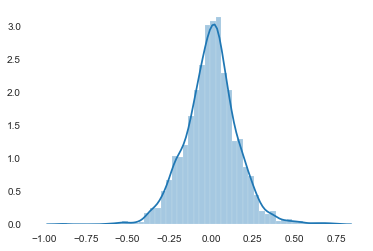

In [102]:
sns.distplot(ols.resid)
plt.show()

> The residuals are normally distributed, so we know that the model is good.

# Sklearn Model

In [105]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, random_state = 12)

In [106]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1750, 33) (750, 33) (1750,) (750,)


In [107]:
sk = LinearRegression().fit(x_train,y_train)

# Predict the values

In [125]:
sk_predict_train = np.exp(sk.predict(x_train))
sk_predict_test = np.exp(sk.predict(x_test))

In [126]:
sk_result_train = pd.DataFrame({'Actual': np.exp(y_train), 'Predicted': sk_predict_train})
sk_result_test = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': sk_predict_test})

# Calculate the Metrics

In [129]:
print('The R-square value of train is : {}'.format(metrics.r2_score(np.exp(y_train), sk_predict_train)))
print('The R-square value of test is : {}'.format(metrics.r2_score(np.exp(y_test), sk_predict_test)))

The R-square value of train is : 0.7883086642700055
The R-square value of test is : 0.7699892114637846


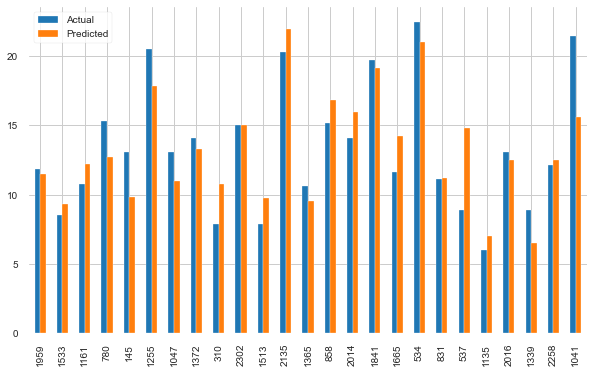

In [136]:
sk_result_test.head(25).plot(kind = 'bar', figsize = (10,6))
plt.grid()
plt.show()

# Get the Residual and plot

In [144]:
residuals = np.exp(y_test) - sk_predict_test

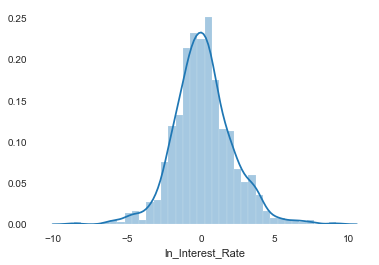

In [146]:
sns.distplot(residuals)
plt.show()

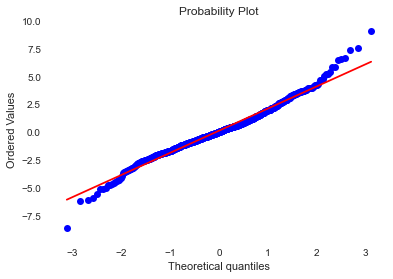

In [151]:
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()

# Model Validation

### Decile Analysis

In [156]:
sk_result_train['Decile'] = pd.qcut(sk_result_train['Predicted'], 10, labels = False)
sk_result_test['Decile'] = pd.qcut(sk_result_test['Predicted'], 10, labels = False)

In [158]:
sk_result_train.groupby('Decile').mean()

Actual  Predicted
Decile                      
0        7.408731   6.967495
1        8.513223   9.006530
2        9.908000  10.298510
3       11.345543  11.355235
4       12.592000  12.402295
5       13.694971  13.248282
6       14.665543  14.081821
7       15.819829  14.990484
8       16.621143  16.322302
9       19.770905  20.212835

In [159]:
sk_result_test.groupby('Decile').mean()

Actual  Predicted
Decile                      
0        7.382267   6.876414
1        8.892107   8.887638
2        9.726667  10.199441
3       11.360400  11.359030
4       12.627067  12.396523
5       13.800933  13.275980
6       14.855867  14.314905
7       15.753600  15.287410
8       17.341065  16.749631
9       19.479723  20.403211

> The Model is predicting perfectly and the model validation is successful

# Export the Model

In [161]:
joblib.dump(ols, 'ols.pkl')

['ols.pkl']

In [163]:
joblib.dump(sk, 'sk.pkl')

['sk.pkl']

# Load the Model

In [165]:
model_clone = joblib.load('ols.pkl')